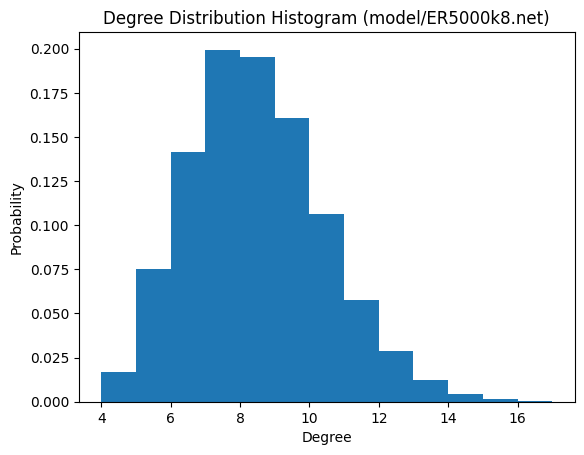

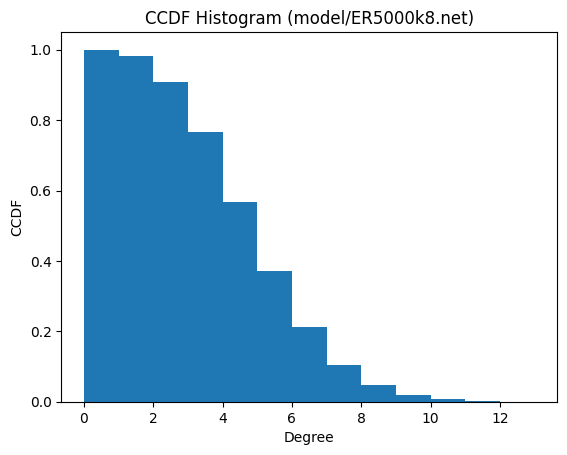

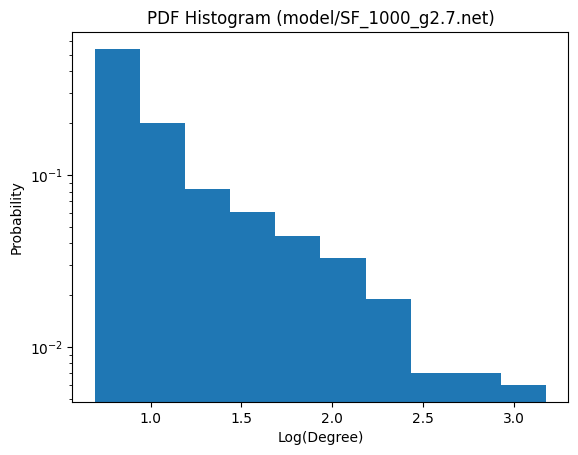

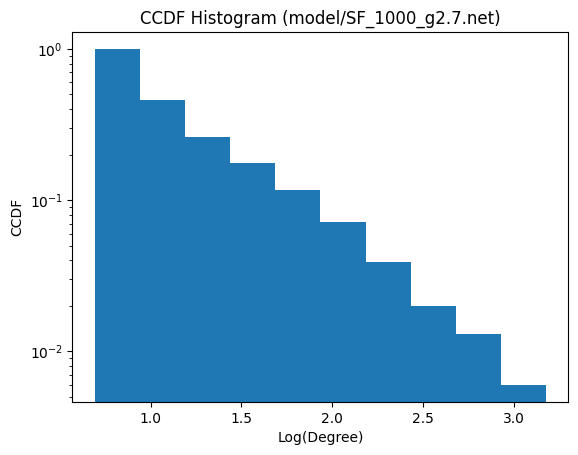

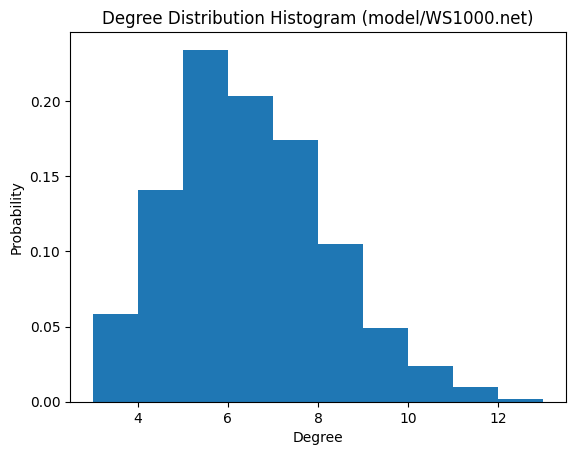

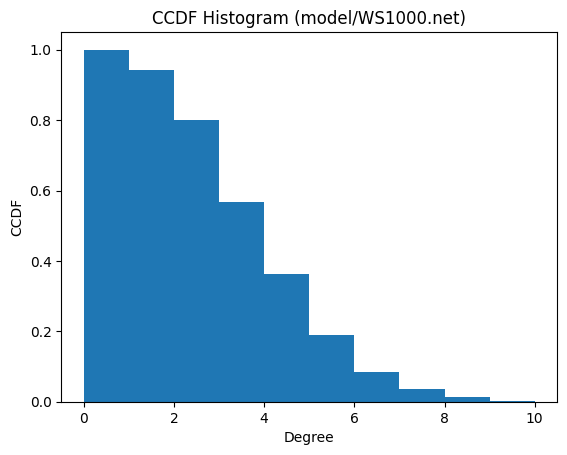

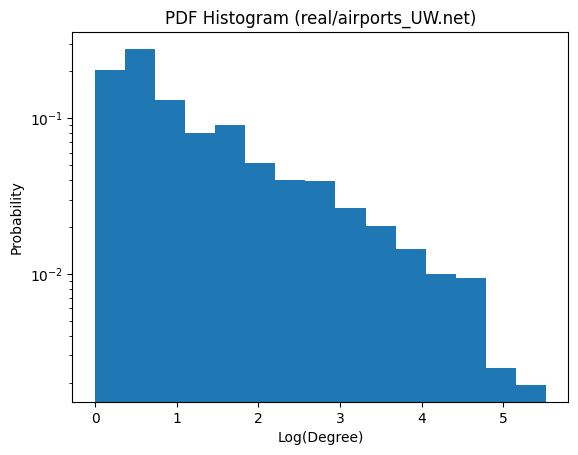

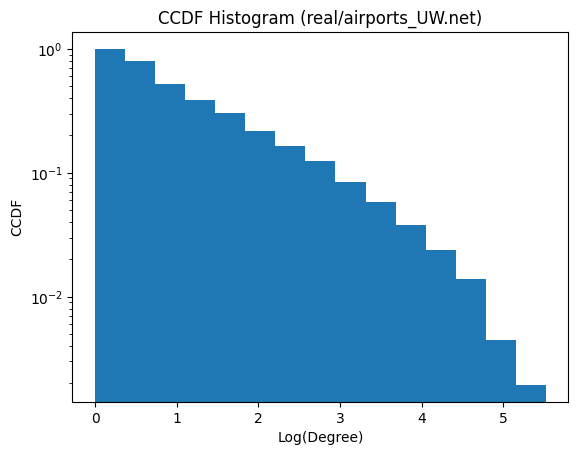

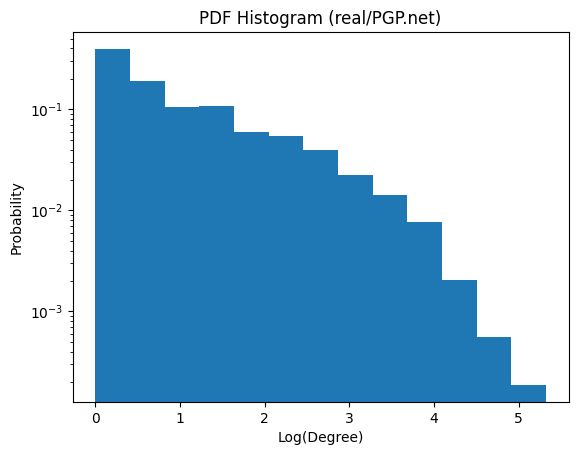

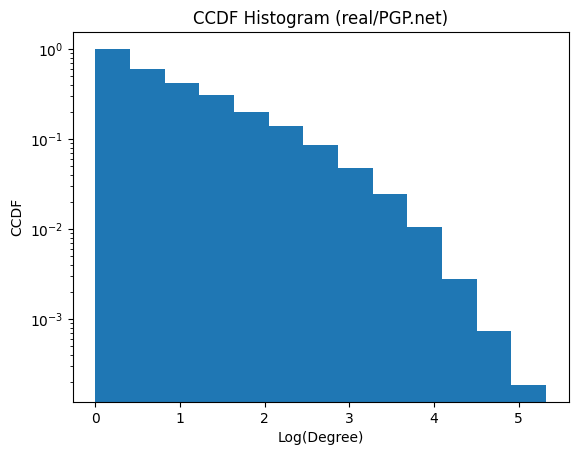

In [61]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Define the list of network file paths
network_list = [
    {"file" : "model/ER5000k8.net", "histogram_form" : "linear", "num_bins" : 13},
    {"file" : "model/SF_1000_g2.7.net", "histogram_form" : "log-log", "num_bins" : 10},
    {"file" : "model/WS1000.net", "histogram_form" : "linear", "num_bins" : 10},
    {"file" : "real/airports_UW.net", "histogram_form" : "log-log", "num_bins" : 15},
    {"file" : "real/PGP.net", "histogram_form" : "log-log", "num_bins" : 13}
]


# Iterate over each network file
for network in network_list:
    # Load the network from the file
    G = nx.Graph(nx.read_pajek(network["file"]))

    # Calculate the degree distribution
    degree_sequence = [d for n, d in G.degree()]

    if network["histogram_form"] == "log-log":
        # Calculate the logarithm of degree_sequence
        log_degree_sequence = np.log(degree_sequence)

        # Find kmin and kmax
        kmin = np.min(log_degree_sequence)
        kmax = np.max(log_degree_sequence)

        # Divide the interval [kmin, kmax] into equal size bins
        bins = np.linspace(kmin, kmax, network["num_bins"] + 1)

        hist, _ = np.histogram(log_degree_sequence, bins=bins)

        # Calculate the probabilities for each bin
        probabilities = hist / len(log_degree_sequence)

        # Plot the PDF histogram
        plt.figure()
        plt.bar(bins[:-1], probabilities, width=np.diff(bins), align='edge', log=True)
        plt.xlabel("Log(Degree)")
        plt.ylabel("Probability")
        plt.title(f"PDF Histogram ({network['file']})")
        plt.show()

        # Calculate the CCDF values
        ccdf_values = np.cumsum(probabilities[::-1])[::-1]

        # Plot the CCDF histogram
        plt.figure()
        plt.bar(bins[:-1], ccdf_values, width=np.diff(bins), align='edge', log=True)
        plt.xlabel("Log(Degree)")
        plt.ylabel("CCDF")
        plt.title(f"CCDF Histogram ({network['file']})")
        plt.show()

    else:
        # Plot the degree distribution histogram
        plt.figure()
        plt.hist(degree_sequence, bins=network["num_bins"], density=True, log=False)
        plt.xlabel("Degree")
        plt.ylabel("Probability")
        plt.title(f"Degree Distribution Histogram ({network['file']})")
        plt.show()

        # Calculate the complementary cumulative degree distribution and plot the histogram following the same structure than linear plot
        hist, _ = np.histogram(degree_sequence, bins=network["num_bins"])
        probabilities = hist / len(degree_sequence)
        ccdf_values = np.cumsum(probabilities[::-1])[::-1]

        plt.figure()
        plt.bar(range(network["num_bins"]), ccdf_values, width=1, align='edge', log=False)
        plt.xlabel("Degree")
        plt.ylabel("CCDF")
        plt.title(f"CCDF Histogram ({network['file']})")
        plt.show()

